# Impact of Regional Nutrition on Country's COVID-19 Recovery Rate
(OHHH NUTS!)

##Instructions
First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

Please execute the three tasks above in a Jupyter notebook that you will submit to the grading team below.

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model
This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

Good luck!

he dataset has been successfully imported and the target variable has been explicitly mentioned.
Good job with data cleaning, checking univariate distribution and checking the outliers for exploratory data analysis (EDA).
Good job in checking the distribution of the independent variables with respect to the target variable.
The variables most suitable for the model have been correctly pointed out for the modelling stage.
At least, two models have been tried. Good job!
Good job in using hyperparameter tuning to get the best set of hyperparameters for the models.
All the models have been correctly compared using the correct metric.

In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sqlalchemy import create_engine
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Upload Global Health Data Sets

## COVID Global Data Set
Source: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset/data
https://storage.googleapis.com/kagglesdsdata/datasets/618335/1175348/Fat_Supply_Quantity_Data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590357735&Signature=bWQ%2Fj3yRSui127xJMXfJ%2BtW6L0L5xx68ngVOg8U3ewhDulVfTGGUSSVyTSQmO5%2FPnt0%2FAXI7zhGfc6Keejv7bDqaK5mB6pZX4YzqHWPfiBo4s8Oa20eVOXlr2fMFdAZSiOLa6d2fpcia9QfebPZflAH4SgGEO5nuqbJLj%2FDOF0Mv1VHkRRp2BZ8dWsogc2jqxDIqISkOnFxasYodcbzL0lKKzPcfF7QJy%2ByzZj3osBjQ0OXCLwjiAT2DdFdwe%2FQ7Bkthv8fNAW8w9uXExH79t%2BL4QV%2F%2F10BKldwlht3mvzg18ZQYIvrmMtA%2BVLsNYBcvSIH5p%2FJCGN1v6fKnTNZXsw%3D%3D&response-content-disposition=attachment%3B+filename%3DFat_Supply_Quantity_Data.csv

## Health Focus Due to Pandemic Observations

### Regional Nutrition
~Observed COVID-19 impact on healthcare workers in my family follow a traditional Eastern Mediterranean diet that includes:
            Citrus fruits, Almonds, Nigella seeds on cheese or bread, Pistachios, and Pine nuts.
            Source: https://anjomanfood.com/nuts-in-the-middle-eastern-and-mediterranean-diet/

~Noticed Iran, Saudi Arabia, UAE (travel hub), Egypt, and Pakistan experienced cases with varying medical responses.
            Eastern Mediterranean region: Afghanistan, Bahrain, Egypt, Iran, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Pakistan, Palestine, Saudi Arabia, Syria, Tunisia, UAE, and Yemen.

~Tracked COVID-19 incidences across WHO maps.

~Excited to test my physican father's theory (and personal diet) out since we were all infected in January-February.

### Healthcare Access
~#1 Key variables to measure healthcare experiencing shortages--in both low and middle-income countries: Ventilator and critical care beds.

~#2 May 6: Iran reached 100,00 COVID-19 cases and still ranked in top 5 globally for over 1 month.
    Source: https://twitter.com/WHOEMRO/status/1258096811786592256/photo/1

In [2]:
#Pathname: Macintosh HD⁩ ▸ ⁨Users⁩ ▸ ⁨mehrunisaqayyum⁩ ▸ ⁨Downloads⁩ Fat_Supply_Quantity_Data.csv || 
import pandas as pd
diet_file = '/Users/mehrunisaqayyum/Downloads/Fat_Supply_Quantity_Data.csv'
df = pd.read_csv(diet_file)
df.head()

Country  Alcoholic Beverages  Animal Products  Animal fats  \
0          Afghanistan                  0.0          21.6397       6.2224   
1              Albania                  0.0          32.0002       3.4172   
2              Algeria                  0.0          14.4175       0.8972   
3               Angola                  0.0          15.3041       1.3130   
4  Antigua and Barbuda                  0.0          27.7033       4.6686   

   Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  \
0                      0.0                    8.0353  0.6859         0.0327   
1                      0.0                    2.6734  1.6448         0.1445   
2                      0.0                    4.2035  1.2171         0.2008   
3                      0.0                    6.5545  0.1539         1.4155   
4                      0.0                    3.2153  0.3872         1.5263   

   Fruits - Excluding Wine     Meat  ...  Vegetable Oils  Vegetables  Obesity  \
0                   0.4246   6.1244  ...         17.0831      0.3593      4.5   
1                   0.6418   8.7428  ...          9.2443      0.6503     22.3   
2                   0.5772   3.8961  ...         27.3606      0.5145     26.6   
3                   0.3488  11.0268  ...         22.4638      0.1231      6.8   
4                   1.2177  14.3202  ...         14.4436      0.2469     19.1   

   Undernourished  Confirmed    Deaths  Recovered    Active  Population  \
0            29.8   0.021411  0.000492   0.002445  0.018474  38042000.0   
1             6.2   0.033730  0.001085   0.026522  0.006123   2858000.0   
2             3.9   0.017375  0.001309   0.009142  0.006925  43406000.0   
3              25   0.000165  0.000010   0.000054  0.000102  31427000.0   
4             NaN   0.025773  0.003093   0.019588  0.003093     97000.0   

   Unit (all except Population)  
0                             %  
1                             %  
2                             %  
3                             %  
4                             %  

[5 rows x 32 columns]

In [3]:
df

Country  Alcoholic Beverages  Animal Products  \
0                           Afghanistan               0.0000          21.6397   
1                               Albania               0.0000          32.0002   
2                               Algeria               0.0000          14.4175   
3                                Angola               0.0000          15.3041   
4                   Antigua and Barbuda               0.0000          27.7033   
..                                  ...                  ...              ...   
165  Venezuela (Bolivarian Republic of)               0.0000          16.3261   
166                             Vietnam               0.0000          33.2484   
167                               Yemen               0.0000          12.5401   
168                              Zambia               0.0783           9.6005   
169                            Zimbabwe               0.0000          10.3796   

     Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  \
0         6.2224                      0.0                    8.0353  0.6859   
1         3.4172                      0.0                    2.6734  1.6448   
2         0.8972                      0.0                    4.2035  1.2171   
3         1.3130                      0.0                    6.5545  0.1539   
4         4.6686                      0.0                    3.2153  0.3872   
..           ...                      ...                       ...     ...   
165       2.2673                      0.0                    2.5449  0.6555   
166       3.8238                      0.0                    3.7155  0.7839   
167       2.0131                      0.0                   11.5271  0.5514   
168       1.6113                      0.0                   14.3225  0.6266   
169       2.9543                      0.0                    9.7922  0.3682   

     Fish, Seafood  Fruits - Excluding Wine     Meat  ...  Vegetable Oils  \
0           0.0327                   0.4246   6.1244  ...         17.0831   
1           0.1445                   0.6418   8.7428  ...          9.2443   
2           0.2008                   0.5772   3.8961  ...         27.3606   
3           1.4155                   0.3488  11.0268  ...         22.4638   
4           1.5263                   1.2177  14.3202  ...         14.4436   
..             ...                      ...      ...  ...             ...   
165         0.5707                   0.9640   7.0949  ...         29.5211   
166         1.1217                   0.4079  26.4292  ...          5.6211   
167         0.3847                   0.2564   8.0010  ...         23.6312   
168         1.0070                   0.1343   4.9010  ...         15.2848   
169         0.2455                   0.0614   4.5674  ...         26.9396   

     Vegetables  Obesity  Undernourished  Confirmed    Deaths  Recovered  \
0        0.3593      4.5            29.8   0.021411  0.000492   0.002445   
1        0.6503     22.3             6.2   0.033730  0.001085   0.026522   
2        0.5145     26.6             3.9   0.017375  0.001309   0.009142   
3        0.1231      6.8              25   0.000165  0.000010   0.000054   
4        0.2469     19.1             NaN   0.025773  0.003093   0.019588   
..          ...      ...             ...        ...       ...        ...   
165      0.1851     25.2            21.2   0.002890  0.000035   0.000919   
166      0.6373      2.1             9.3   0.000339  0.000000   0.000275   
167      0.1667     14.1            38.9   0.000631  0.000103   0.000017   
168      0.1567      6.5            46.7   0.004658  0.000039   0.001103   
169      0.0789     12.3            51.3   0.000328  0.000027   0.000123   

       Active  Population  Unit (all except Population)  
0    0.018474  38042000.0                             %  
1    0.006123   2858000.0                             %  
2    0.006925  43406000.0                             %  
3    0.000102  31427000.0               

In [4]:
df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

## World Health Organization Life Expectancy Data Set

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [6]:
life_df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [7]:
#df.loc[df['shield'] > 6]
life_df.loc[life_df['Life expectancy '] > 70]

Country  Year      Status  Life expectancy   Adult Mortality  \
16     Albania  2015  Developing              77.8             74.0   
17     Albania  2014  Developing              77.5              8.0   
18     Albania  2013  Developing              77.2             84.0   
19     Albania  2012  Developing              76.9             86.0   
20     Albania  2011  Developing              76.6             88.0   
...        ...   ...         ...               ...              ...   
2885  Viet Nam  2004  Developing              74.2            136.0   
2886  Viet Nam  2003  Developing              74.0            137.0   
2887  Viet Nam  2002  Developing              73.8            137.0   
2888  Viet Nam  2001  Developing              73.6            138.0   
2889  Viet Nam  2000  Developing              73.4            139.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
16                0     4.60              364.975229         99.0         0   
17                0     4.51              428.749067         98.0         0   
18                0     4.76              430.876979         99.0         0   
19                0     5.14              412.443356         99.0         9   
20                0     5.37              437.062100         99.0        28   
...             ...      ...                     ...          ...       ...   
2885             29     2.86                0.000000         94.0       217   
2886             30     2.19                0.000000         78.0      2297   
2887             30     2.03                0.000000          NaN      6755   
2888             32     1.84                0.000000          NaN     12058   
2889             33     1.60                0.000000          NaN     16512   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
16    ...   99.0               6.00         99.0        0.1  3954.227830   
17    ...   98.0               5.88         98.0        0.1  4575.763787   
18    ...   99.0               5.66         99.0        0.1  4414.723140   
19    ...   99.0               5.59         99.0        0.1  4247.614380   
20    ...   99.0               5.71         99.0        0.1  4437.178680   
...   ...    ...                ...          ...        ...          ...   
2885  ...   96.0               5.90         96.0        0.2          NaN   
2886  ...   96.0               4.84         99.0        0.2          NaN   
2887  ...   92.0               4.70         75.0        0.2          NaN   
2888  ...   96.0               5.17         96.0        0.1          NaN   
2889  ...   96.0               4.89         96.0        0.1          NaN   

      Population   thinness  1-19 years   thinness 5-9 years  \
16       28873.0                    1.2                  1.3   
17      288914.0                    1.2                  1.3   
18      289592.0                    1.3                  1.4   
19        2941.0                    1.3                  1.4   
20      295195.0                    1.4                  1.5   
...          ...                    ...                  ...   
2885         NaN                   15.4                 16.1   
2886         NaN                   15.6                 16.2   
2887         NaN                   15.6                 16.3   
2888         NaN                   15.7                 16.4   
2889         NaN                   15.8                 16.4   

      Income composition of resources  Schooling  
16                              0.762       14.2  
17                              0.761       14.2  
18                              0.759       14.2  
19                              0.752       14.2  
20                              0.738       13.3  
...                               ...        ...  
2885                            0.601       11.0  
2886                            0.592       10.9  
2887                            0.584       10.7  
2888         

### Observation
We selected countries with a life expectancy over age '70'.

In [8]:
life_df.index

RangeIndex(start=0, stop=2938, step=1)

In [9]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Exploratory Data Analysis
1) Join data sets df and life_df to be covid_df. Perform any data cleaning.
2) Explore data to discover relationships and features. We will explore the data using both statistics and data visualization. 
3) Perform feature engineering by reviewing the most important variables and transforming into features to predict, classify, or measure our target variable.

### Exploratory Note:
Both data sets include countries as columns, which will serve as the key. However, the 'life_df' set includes multiple years for each country, so we will select the most recent year for each country to join as the key when we append the data sets. 

In [10]:
ProfileReport(df)

In [11]:
ProfileReport(life_df)

In [12]:
life_df2 = life_df['Year'].max()
life_df2

2015

In [13]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [14]:
df.nunique()

Country                         170
Alcoholic Beverages               3
Animal Products                 170
Animal fats                     169
Aquatic Products, Other           6
Cereals - Excluding Beer        170
Eggs                            169
Fish, Seafood                   170
Fruits - Excluding Wine         168
Meat                            170
Miscellaneous                   137
Milk - Excluding Butter         169
Offals                          167
Oilcrops                        170
Pulses                          160
Spices                          155
Starchy Roots                   166
Stimulants                      169
Sugar Crops                      11
Sugar & Sweeteners                9
Treenuts                        162
Vegetal Products                170
Vegetable Oils                  170
Vegetables                      168
Obesity                         120
Undernourished                   98
Confirmed                       161
Deaths                      

In [15]:
#Unique values
df['Recovered'].value_counts()

0.003040    1
0.071988    1
0.014166    1
0.000696    1
0.029198    1
           ..
0.001495    1
0.020174    1
0.007278    1
0.000017    1
0.000000    1
Name: Recovered, Length: 161, dtype: int64

In [16]:
df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [17]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Exploratory Note: We will drop less used from first data frame: 
Alcoholic Beverages, Sugar Crops, Sugar & Sweeteners ,Undernourished, Miscellaneous,Aquatic Products, Other,Undernourished,

In [18]:
#Drop less used from first data frame: Alcoholic Beverages, Sugar Crops, Sugar & Sweeteners ,Undernourished, Miscellaneous,Aquatic Products, Other,Undernourished,  
df2 = df.drop(['Alcoholic Beverages','Aquatic Products, Other','Sugar & Sweeteners','Sugar Crops','Miscellaneous','Undernourished','Aquatic Products, Other',], axis=1)
df2

Country  Animal Products  Animal fats  \
0                           Afghanistan          21.6397       6.2224   
1                               Albania          32.0002       3.4172   
2                               Algeria          14.4175       0.8972   
3                                Angola          15.3041       1.3130   
4                   Antigua and Barbuda          27.7033       4.6686   
..                                  ...              ...          ...   
165  Venezuela (Bolivarian Republic of)          16.3261       2.2673   
166                             Vietnam          33.2484       3.8238   
167                               Yemen          12.5401       2.0131   
168                              Zambia           9.6005       1.6113   
169                            Zimbabwe          10.3796       2.9543   

     Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
0                      8.0353  0.6859         0.0327                   0.4246   
1                      2.6734  1.6448         0.1445                   0.6418   
2                      4.2035  1.2171         0.2008                   0.5772   
3                      6.5545  0.1539         1.4155                   0.3488   
4                      3.2153  0.3872         1.5263                   1.2177   
..                        ...     ...            ...                      ...   
165                    2.5449  0.6555         0.5707                   0.9640   
166                    3.7155  0.7839         1.1217                   0.4079   
167                   11.5271  0.5514         0.3847                   0.2564   
168                   14.3225  0.6266         1.0070                   0.1343   
169                    9.7922  0.3682         0.2455                   0.0614   

        Meat  Milk - Excluding Butter  Offals  ...  Vegetal Products  \
0     6.1244                   8.2803  0.3103  ...           28.3684   
1     8.7428                  17.7576  0.2933  ...           17.9998   
2     3.8961                   8.0934  0.1067  ...           35.5857   
3    11.0268                   1.2309  0.1539  ...           34.7010   
4    14.3202                   6.6607  0.1347  ...           22.2995   
..       ...                      ...     ...  ...               ...   
165   7.0949                   5.5217  0.2082  ...           33.6855   
166  26.4292                   0.7520  0.3378  ...           16.7548   
167   8.0010                   1.3463  0.2436  ...           37.4535   
168   4.9010                   1.2756  0.1790  ...           40.3939   
169   4.5674                   2.1040  0.1315  ...           39.6248   

     Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered  \
0           17.0831      0.3593      4.5   0.021411  0.000492   0.002445   
1            9.2443      0.6503     22.3   0.033730  0.001085   0.026522   
2           27.3606      0.5145     26.6   0.017375  0.001309   0.009142   
3           22.4638      0.1231      6.8   0.000165  0.000010   0.000054   
4           14.4436      0.2469     19.1   0.025773  0.003093   0.019588   
..              ...         ...      ...        ...       ...        ...   
165         29.5211      0.1851     25.2   0.002890  0.000035   0.000919   
166          5.6211      0.6373      2.1   0.000339  0.000000   0.000275   
167         23.6312      0.1667     14.1   0.000631  0.000103   0.000017   
168         15.2848      0.1567      6.5   0.004658  0.000039   0.001103   
169         26.9396      0.0789     12.3   0.000328  0.000027   0.000123   

       Active  Population  Unit (all except Population)  
0    0.018474  38042000.0                             %  
1    0.006123   2858000.0                             %  
2    0.006925  43406000.0                             %  
3    0.000102  31427000.0                             %  
4    0.003093     97000.0                             %  
..        ...         ...                           ... 

In [19]:
#Drop less used from second data frame, Life data frame:
life_df2 = life_df.drop(['Measles ','Hepatitis B','infant deaths',' thinness  1-19 years','Alcohol', ' thinness 5-9 years','GDP','Total expenditure'], axis=1)
life_df2

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      percentage expenditure   BMI   under-five deaths   Polio  Diphtheria   \
0                  71.279624   19.1                  83    6.0         65.0   
1                  73.523582   18.6                  86   58.0         62.0   
2                  73.219243   18.1                  89   62.0         64.0   
3                  78.184215   17.6                  93   67.0         67.0   
4                   7.097109   17.2                  97   68.0         68.0   
...                      ...    ...                 ...    ...          ...   
2933                0.000000   27.1                  42   67.0         65.0   
2934                0.000000   26.7                  41    7.0         68.0   
2935                0.000000   26.3                  40   73.0         71.0   
2936                0.000000   25.9                  39   76.0         75.0   
2937                0.000000   25.5                  39   78.0         78.0   

       HIV/AIDS  Population  Income composition of resources  Schooling  
0           0.1  33736494.0                            0.479       10.1  
1           0.1    327582.0                            0.476       10.0  
2           0.1  31731688.0                            0.470        9.9  
3           0.1   3696958.0                            0.463        9.8  
4           0.1   2978599.0                            0.454        9.5  
...         ...         ...                              ...        ...  
2933       33.6  12777511.0                            0.407        9.2  
2934       36.7  12633897.0                            0.418        9.5  
2935       39.8    125525.0                            0.427       10.0  
2936       42.1  12366165.0                            0.427        9.8  
2937       43.5  12222251.0                            0.434        9.8  

[2938 rows x 14 columns]

In [20]:
life_df.tail(140)

Country  Year      Status  Life expectancy   \
2798  United States of America  2011   Developed              78.7   
2799  United States of America  2010   Developed              78.7   
2800  United States of America  2009   Developed              78.5   
2801  United States of America  2008   Developed              78.2   
2802  United States of America  2007   Developed              78.1   
...                        ...   ...         ...               ...   
2933                  Zimbabwe  2004  Developing              44.3   
2934                  Zimbabwe  2003  Developing              44.5   
2935                  Zimbabwe  2002  Developing              44.8   
2936                  Zimbabwe  2001  Developing              45.3   
2937                  Zimbabwe  2000  Developing              46.0   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2798             16.0             25     8.67                     0.0   
2799             15.0             25     8.55                     0.0   
2800             18.0             26     8.71                     0.0   
2801             18.0             27     8.74                     0.0   
2802             11.0             27     8.74                     0.0   
...               ...            ...      ...                     ...   
2933            723.0             27     4.36                     0.0   
2934            715.0             26     4.06                     0.0   
2935             73.0             25     4.43                     0.0   
2936            686.0             25     1.72                     0.0   
2937            665.0             24     1.68                     0.0   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
2798         91.0       220  ...   94.0              17.60         96.0   
2799         92.0        63  ...   93.0              17.20         95.0   
2800         92.0        71  ...   93.0              17.00         95.0   
2801         94.0       140  ...   94.0              16.20         96.0   
2802         93.0        43  ...   93.0              15.57         96.0   
...           ...       ...  ...    ...                ...          ...   
2933         68.0        31  ...   67.0               7.13         65.0   
2934          7.0       998  ...    7.0               6.52         68.0   
2935         73.0       304  ...   73.0               6.53         71.0   
2936         76.0       529  ...   76.0               6.16         75.0   
2937         79.0      1483  ...   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
2798        0.1         NaN         NaN                    0.7   
2799        0.1         NaN         NaN                    0.7   
2800        0.1         NaN         NaN                    0.7   
2801        0.1         NaN         NaN                    0.7   
2802        0.1         NaN         NaN                    0.7   
...         ...         ...         ...                    ...   
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
2798                  0.6                              NaN        NaN  
2799                  0.6                              NaN        NaN  
2800                  0.6                              NaN        NaN  
2801                  0.6                              NaN        NaN  
2802                  0.6                              NaN        NaN  
...                   ...                              ...        ...  
2933                  9.4                            0.407        9.2  
2934                  9.9          

### Join datasets by key 'Country' 
We will join both dataframes and select only Year == 2015 from the life_df2 dataframe to create a new dataframe: covid_df.


In [21]:
covid_df = pd.merge(df2, life_df2[life_df2['Year'] == 2015], left_on = 'Country', right_on = 'Country')

In [22]:
covid_df

Country  Animal Products  Animal fats  \
0                           Afghanistan          21.6397       6.2224   
1                               Albania          32.0002       3.4172   
2                               Algeria          14.4175       0.8972   
3                                Angola          15.3041       1.3130   
4                   Antigua and Barbuda          27.7033       4.6686   
..                                  ...              ...          ...   
152                             Vanuatu          14.9179       1.9531   
153  Venezuela (Bolivarian Republic of)          16.3261       2.2673   
154                               Yemen          12.5401       2.0131   
155                              Zambia           9.6005       1.6113   
156                            Zimbabwe          10.3796       2.9543   

     Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
0                      8.0353  0.6859         0.0327                   0.4246   
1                      2.6734  1.6448         0.1445                   0.6418   
2                      4.2035  1.2171         0.2008                   0.5772   
3                      6.5545  0.1539         1.4155                   0.3488   
4                      3.2153  0.3872         1.5263                   1.2177   
..                        ...     ...            ...                      ...   
152                    4.1249  0.3509         1.4343                   0.3052   
153                    2.5449  0.6555         0.5707                   0.9640   
154                   11.5271  0.5514         0.3847                   0.2564   
155                   14.3225  0.6266         1.0070                   0.1343   
156                    9.7922  0.3682         0.2455                   0.0614   

        Meat  Milk - Excluding Butter  Offals  ...  Adult Mortality  \
0     6.1244                   8.2803  0.3103  ...            263.0   
1     8.7428                  17.7576  0.2933  ...             74.0   
2     3.8961                   8.0934  0.1067  ...             19.0   
3    11.0268                   1.2309  0.1539  ...            335.0   
4    14.3202                   6.6607  0.1347  ...             13.0   
..       ...                      ...     ...  ...              ...   
152   9.9334                   1.1495  0.0966  ...             13.0   
153   7.0949                   5.5217  0.2082  ...            157.0   
154   8.0010                   1.3463  0.2436  ...            224.0   
155   4.9010                   1.2756  0.1790  ...             33.0   
156   4.5674                   2.1040  0.1315  ...            336.0   

     percentage expenditure   BMI   under-five deaths   Polio  Diphtheria   \
0                 71.279624   19.1                  83    6.0         65.0   
1                364.975229   58.0                   0   99.0         99.0   
2                  0.000000   59.5                  24   95.0         95.0   
3                  0.000000   23.3                  98    7.0         64.0   
4                  0.000000   47.7                   0   86.0         99.0   
..                      ...    ...                 ...    ...          ...   
152                0.000000   53.3                   0   65.0         64.0   
153                0.000000   62.1                  10   87.0         87.0   
154                0.000000   41.3                  47   63.0         69.0   
155                0.000000   23.4                  40    9.0          9.0   
156                0.000000   31.8                  32   88.0         87.0   

      HIV/AIDS  Population_y  Income composition of resources  Schooling  
0          0.1    33736494.0                            0.479       10.1  
1          0.1       28873.0                            0.762       14.2  
2          0.1    39871528.0                            0.743       14.4  
3          1.9     2785935.0                            0.531       11.4  
4          0.2   

## Univariate Analysis

In [23]:
covid_df.corr()

Animal Products  Animal fats  \
Animal Products                         1.000000     0.696317   
Animal fats                             0.696317     1.000000   
Cereals - Excluding Beer               -0.464931    -0.407189   
Eggs                                    0.470419     0.281349   
Fish, Seafood                          -0.021730    -0.118791   
Fruits - Excluding Wine                -0.112444    -0.168326   
Meat                                    0.736699     0.231632   
Milk - Excluding Butter                 0.634589     0.342875   
Offals                                  0.065823    -0.179648   
Oilcrops                               -0.436742    -0.340163   
Pulses                                 -0.425094    -0.315595   
Spices                                 -0.183738    -0.200584   
Starchy Roots                          -0.389973    -0.303520   
Stimulants                              0.507705     0.280966   
Treenuts                                0.159286     0.161809   
Vegetal Products                       -1.000000    -0.696306   
Vegetable Oils                         -0.662161    -0.369446   
Vegetables                              0.083535    -0.083130   
Obesity                                 0.430380     0.391204   
Confirmed                               0.357898     0.353236   
Deaths                                  0.226872     0.329210   
Recovered                               0.338004     0.318047   
Active                                  0.213949     0.214089   
Population_x                            0.000845     0.019125   
Year                                         NaN          NaN   
Life expectancy                         0.627147     0.538355   
Adult Mortality                        -0.401995    -0.353027   
percentage expenditure                  0.113623    -0.008614   
 BMI                                    0.427160     0.369455   
under-five deaths                      -0.204313    -0.039779   
Polio                                   0.385766     0.279839   
Diphtheria                              0.286291     0.239359   
 HIV/AIDS                              -0.374073    -0.313355   
Population_y                           -0.175792    -0.083317   
Income composition of resources         0.689126     0.594815   
Schooling                               0.616102     0.561922   

                                 Cereals - Excluding Beer      Eggs  \
Animal Products                                 -0.464931  0.470419   
Animal fats                                     -0.407189  0.281349   
Cereals - Excluding Beer                         1.000000 -0.301811   
Eggs                                            -0.301811  1.000000   
Fish, Seafood                                   -0.041983  0.206953   
Fruits - Excluding Wine                          0.016833 -0.061869   
Meat                                            -0.278022  0.242745   
Milk - Excluding Butter                         -0.276145  0.273953   
Offals                                           0.281311 -0.122609   
Oilcrops                                         0.113556 -0.342333   
Pulses                                           0.406925 -0.331933   
Spices                                           0.123360 -0.002724   
Starchy Roots                                    0.210341 -0.351431   
Stimulants                                      -0.264135  0.278077   
Treenuts                                        -0.205887  0.292638   
Vegetal Products                                 0.464931 -0.470465   
Vegetable Oils                                   0.005906 -0.197051   
Vegetables                                       0.044259  0.164613   
Obesity                                         -0.497187  0.309372   
Confirmed                                       -0.362804  0.291238   
Deaths                                          -0.295061  0.129442   
Recovered                                       -0.288803  0.1872

In [24]:
ProfileReport(covid_df)

### Analysis Note:
Highly correlated =or Above +/- .5 correlation: Schooling w/'animal fat'

### Indicator of Health Index: 
To control for availability of ventilators or other country financed health interventions and infrastructure to deal with health emergencies, like pandemics.


~Index: Global Healthy Security Index https://www.ghsindex.org/wp-content/uploads/2019/10/2019-Global-Health-Security-Index.pdf
    Although 86% of countries invest local or donor funds in health security, few countries pay for health security gap assessments and action plans out of national budgets.
~Variable: Ventilators

~Variable: Critical Care Beds
Saudi Arabia -22.8 per 100,000 (high)
Pakistan - 1.5 (lower-middle)
Iran - 4.6 (upper-middle medium)
Oman - 14.6 (high)
Yemen
Source: https://www.researchgate.net/figure/Number-of-critical-care-beds-per-100-000-population_fig1_338520008
expenditure health - https://link.springer.com/article/10.1007/s00134-012-2627-8

In [25]:

# Define a dictionary containing Health Index 
health_score_data = {'Country': ['United States','United Kingdom', 'Netherlands', 'Australia','Canada','Thailand','Sweden',
                                 'Denmark','South Korea','Finland','France','Slovenia','Switzerland','Germany','Spain','Norway',
                                 'Latvia','Malaysia','Belgium','Portugal','Japan', 'Brazil','Ireland','Singapore','Argentina',
                                 'Austria','Chile','Mexico','Estonia','Indonesia','Italy','Poland','Lithuania','South Africa',
                                 'Hungary','New Zealand','Greece','Croatia','Albania','Turkey','Serbia','Czech Republic','Georgia',
                                 'Armenia','Ecuador','Mongolia','Kyrgyz Republic','Saudi Arabia','Peru','Vietnam','China','Slovakia',
                                 'Philippines','Israel','Kenya','United Arab Emirates','India','Iceland','Kuwait','Romania',
                                 'Bulgaria','Costa Rica','Russia','Uganda','Colombia','El Salvador','Luxembourg','Montenegro','Morocco',
                                 'Panama','Liechtenstein','Myanmar','Laos','Lebanon','Nicaragua','Oman','Cyprus','Moldova',
                                 'Bosnia and Herzegovina','Jordan','Uruguay','Qatar','Kazakhstan','Ethiopia','Bhutan','Madagascar',
                                 'Egypt','Bahrain','Cambodia','North Macedonia','Dominican Republic','Sierra Leone','Zimbabwe','Ukraine',
                                 'Senegal','Nigeria','Iran','Malta','Trinidad and Tobago','Suriname','Tanzania','Bolivia',
                                 'Paraguay','Namibia',"Côte d'Ivoire",'Ghana','Pakistan','Belarus','St. Lucia','Cuba','Liberia','Nepal',
                                 'Bangladesh','Mauritius','Cameroon','Uzbekistan','Azerbaijan','Gambia','Rwanda','Sri Lanka','Maldives',
                                 'Tunisia','St. Vincent and The Grenadines','Micronesia','Guatemala','Guinea','Monaco','Brunei','Togo',
                                 'Afghanistan','Tajikistan','Niger','Barbados','Seychelles','Belize','Turkmenistan', 'Guyana','Haiti',
                                 'Botswana','San Marino','Swaziland','Bahamas','Andorra','Lesotho','Burkina Faso','Cabo Verde',
                                 'Antigua and Barbuda','Jamaica','Mali','Benin','Chad','Zambia','Mozambique','Malawi',
                                 'Papua New Guinea','Honduras','Grenada','Mauritania','Central African Republic','Comoros','Congo','Samoa',
                                 'St. Kitts and Nevis','Sudan','Vanuatu','Timor-Leste','Iraq','Fiji','Libya','Angola','Tonga',
                                 'Dominica','Algeria','Brazzaville','Djibouti','Venezuela','Burundi','Eritrea','Palau','South Sudan','Tuvalu',
                                 'Nauru','Solomon Islands','Niue','Cook Islands','Gabon','Guinea-Bissau','Syria','Kiribati',
                                 'Yemen','Marshall Islands','São Tomé and Príncipe','North Korea','Somalia','Equatorial Guinea'],
                     
        'Health_index': [83.5,77.9,75.6,75.5,75.3,73.2,72.1,70.4,70.2,68.7,68.2,67.2,67.0,66.0,65.9,64.6,62.9,62.2,61.0,
                        60.3,59.8,59.7,59.0,58.7,58.6,58.5,58.3,57.6,57.0,56.6,56.2,55.4,55.0,54.8,54.0,54.0,53.8,53.3,52.9,52.4,
                        52.3,52.0,52.0,50.2,50.1,49.5,49.3,49.3,49.2,49.1,48.2,47.9,47.6,47.3,47.1,46.7,46.5,46.3,46.1,45.8,45.6,
                        45.1,44.3,44.3,44.2,44.2,43.8,43.7,43.7,43.7,43.5,43.4,43.1,43.1,43.1,43.1,43.0,42.9,42.8,42.1,
                        41.3,41.2,40.7,40.6,40.3,40.1,39.9,39.4,39.2,39.1,38.3,38.2,38.2,38.0,37.9,37.8,37.7,37.3,36.6,36.5,36.4,
                        35.8,35.7,35.6,35.5,35.5,35.5,35.3,35.3,35.2,35.1,35.1,35.0,34.9,34.4,34.3,34.2,34.2,34.2,33.9,33.8,33.7,
                        33.0,32.8,32.7,32.7,32.7,32.6,32.5,32.3,32.3,32.2,31.9,31.9,31.8,31.8,31.7,31.5,31.1,31.1,31.1,30.6,30.5,
                        30.2,30.1,29.3,29.0,29.0,29.0,28.8,28.8,28.7,28.1,28.0,27.8,27.6,27.5,27.5,27.3,27.2,26.5,26.4,26.2,26.2,
                        26.1,26.0,25.8,25.7,25.7,25.2,25.1,24.0,23.6,23.6,23.2,23.0,22.8,22.4,21.9,21.7,21.6,20.8,20.7,20.5,
                        20.4,20.0,20.0,19.9,19.2,18.5,18.2,17.7,17.5,16.6,16.2]} 
  
# Convert the dictionary to add into DataFrame 
health_df = pd.DataFrame(health_score_data) 
  
# Using DataFrame.insert() to add the column into covid_df
#covid_df.insert(df2["health_score_data"]) 

#Merge the 2 data sets
merged_df = pd.merge(covid_df, health_df, left_on='Country', right_on='Country')

In [26]:
len(health_score_data['Country'])

195

In [27]:
merged_df.describe()

Animal Products  Animal fats  Cereals - Excluding Beer        Eggs  \
count       145.000000   145.000000                145.000000  145.000000   
mean         20.523469     4.186661                  4.506248    0.961694   
std           8.081516     3.432512                  3.257513    0.666706   
min           5.018200     0.034800                  0.990800    0.058000   
25%          13.676600     1.611300                  2.118700    0.350900   
50%          20.151100     3.221300                  3.447900    0.901900   
75%          26.910000     6.378700                  5.737400    1.266400   
max          36.901800    14.937300                 18.376300    3.275600   

       Fish, Seafood  Fruits - Excluding Wine        Meat  \
count     145.000000               145.000000  145.000000   
mean        0.853244                 0.550711    9.116830   
std         0.976601                 0.899651    4.345607   
min         0.017400                 0.037300    0.906100   
25%         0.318900                 0.237300    6.101000   
50%         0.563300                 0.351700    8.912700   
75%         1.045700                 0.577200   11.558100   
max         8.406800                 9.672700   21.606200   

       Milk - Excluding Butter      Offals    Oilcrops  ...  \
count               145.000000  145.000000  145.000000  ...   
mean                  5.255140    0.149395    3.347308  ...   
std                   3.348297    0.116589    4.752064  ...   
min                   0.177900    0.000000    0.064000  ...   
25%                   2.229600    0.076300    0.856600  ...   
50%                   5.127900    0.118000    1.580300  ...   
75%                   7.592600    0.188500    3.438900  ...   
max                  17.757600    0.726800   28.563900  ...   

       percentage expenditure        BMI   under-five deaths        Polio  \
count              145.000000  144.000000          145.000000  145.000000   
mean                 3.008654   43.340972           34.110345   83.041379   
std                 30.841796   20.697557          117.879418   23.977094   
min                  0.000000    2.500000            0.000000    6.000000   
25%                  0.000000   24.300000            0.000000   83.000000   
50%                  0.000000   52.600000            3.000000   93.000000   
75%                  0.000000   61.450000           21.000000   97.000000   
max                364.975229   77.600000         1100.000000   99.000000   

       Diphtheria     HIV/AIDS  Population_y  Income composition of resources  \
count   145.000000  145.000000  1.300000e+02                       145.000000   
mean     84.703448    0.657241  1.178883e+07                         0.697276   
std      21.768710    1.336545  3.013329e+07                         0.155513   
min       6.000000    0.100000  2.966000e+03                         0.347000   
25%      84.000000    0.100000  2.970185e+05                         0.575000   
50%      93.000000    0.100000  2.510890e+06                         0.734000   
75%      97.000000    0.300000  1.095208e+07                         0.804000   
max      99.000000    9.300000  2.581621e+08                         0.948000   

        Schooling  Health_index  
count  145.000000    145.000000  
mean    13.077241     42.395172  
std      2.938318     13.696793  
min      5.400000     18.500000  
25%     10.800000     31.900000  
50%     13.100000     40.100000  
75%     15.300000     52.300000  
max     20.400000     75.600000  

[8 rows x 37 columns]

### Visual 1: Health Score Index verus Recovered

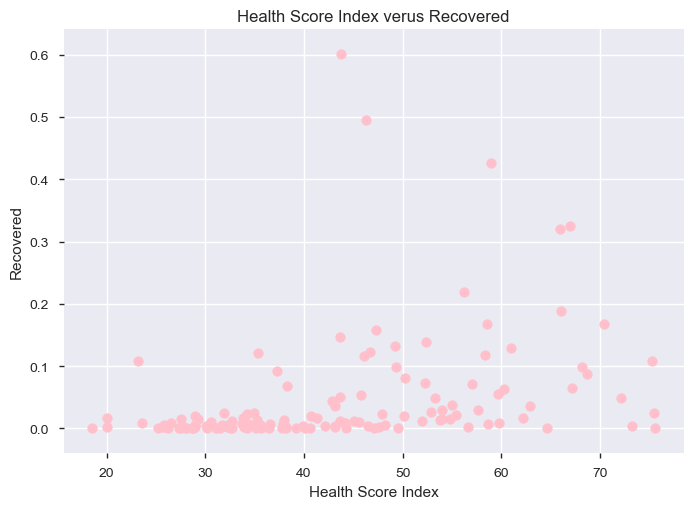

In [28]:
a = merged_df['Health_index']
b = merged_df['Recovered']
plt.scatter(a,b, color ='pink')
plt.xlabel('Health Score Index')
plt.ylabel("Recovered")
plt.title('Health Score Index verus Recovered')
plt.show()

### Observation: 
Note thata HSI indicates access to infrastructure, like more ventilators and critical beds). However, we see that that countries having the highest "Health Score Index" (HSI) do not present the highest 'Recovered' rates for COVID_19 cases. Actually, those in the mid range of HSI, present the highest recovery rate 'Recovered'. Other contributing factors, like nutrition or dietary choices, may factor into the features importance. 

We will conduct a 'features importance' test. Below, we will show in visuals 2-5 where our nutritional factors correlate with each other and our target of interest: the "Recovered" rate for COVID-19 cases.   

In [29]:
merged_df.columns

Index(['Country', 'Animal Products', 'Animal fats', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Treenuts', 'Vegetal Products',
       'Vegetable Oils', 'Vegetables', 'Obesity', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population_x', 'Unit (all except Population)',
       'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'percentage expenditure', ' BMI ', 'under-five deaths ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'Population_y',
       'Income composition of resources', 'Schooling', 'Health_index'],
      dtype='object')

## Missing Values
Need to fill in missing values for Percentage Expenditure, BMI, Polio, Treenuts, Pulses, Vegetables, 

In [30]:
life_df2['percentage expenditure'].fillna(life_df2['percentage expenditure'].mean(), inplace=True)

In [31]:
life_df2[' BMI '].fillna(life_df2[' BMI '].mean(), inplace=True)

In [32]:
life_df2['Polio'].fillna(life_df2['Polio'].mean(), inplace=True)

In [33]:
df2['Treenuts'].fillna(df2['Treenuts'].mean(),inplace=True)

In [34]:
df2['Pulses'].fillna(df2['Pulses'].mean(),inplace=True)

In [35]:
df2['Vegetables'].fillna(df2['Vegetables'].mean(),inplace=True)

In [36]:
df2['Meat'].fillna(df2['Meat'].mean(),inplace=True)

In [37]:
df2['Recovered'].value_counts() 

0.003040    1
0.071988    1
0.014166    1
0.000696    1
0.029198    1
           ..
0.001495    1
0.020174    1
0.007278    1
0.000017    1
0.000000    1
Name: Recovered, Length: 161, dtype: int64

In [38]:
merged_df.corr()

Animal Products  Animal fats  \
Animal Products                         1.000000     0.710333   
Animal fats                             0.710333     1.000000   
Cereals - Excluding Beer               -0.478648    -0.416339   
Eggs                                    0.469318     0.262446   
Fish, Seafood                          -0.022442    -0.116403   
Fruits - Excluding Wine                -0.101656    -0.159390   
Meat                                    0.736385     0.251783   
Milk - Excluding Butter                 0.641814     0.351140   
Offals                                  0.029119    -0.194524   
Oilcrops                               -0.413549    -0.329150   
Pulses                                 -0.419936    -0.311695   
Spices                                 -0.209950    -0.194603   
Starchy Roots                          -0.387591    -0.302344   
Stimulants                              0.495903     0.296297   
Treenuts                                0.188401     0.164782   
Vegetal Products                       -1.000000    -0.710321   
Vegetable Oils                         -0.669238    -0.389604   
Vegetables                              0.071712    -0.100507   
Obesity                                 0.435854     0.392369   
Confirmed                               0.385509     0.363431   
Deaths                                  0.244084     0.340994   
Recovered                               0.348826     0.310547   
Active                                  0.249087     0.241329   
Population_x                            0.002143     0.017692   
Year                                         NaN          NaN   
Life expectancy                         0.634044     0.539625   
Adult Mortality                        -0.432882    -0.369972   
percentage expenditure                  0.118921    -0.008903   
 BMI                                    0.437910     0.379134   
under-five deaths                      -0.199489    -0.036428   
Polio                                   0.398435     0.289351   
Diphtheria                              0.295216     0.248572   
 HIV/AIDS                              -0.375809    -0.317849   
Population_y                           -0.180596    -0.084778   
Income composition of resources         0.701782     0.596489   
Schooling                               0.629505     0.563103   
Health_index                            0.515481     0.506550   

                                 Cereals - Excluding Beer      Eggs  \
Animal Products                                 -0.478648  0.469318   
Animal fats                                     -0.416339  0.262446   
Cereals - Excluding Beer                         1.000000 -0.308149   
Eggs                                            -0.308149  1.000000   
Fish, Seafood                                   -0.054167  0.223854   
Fruits - Excluding Wine                          0.009134 -0.052851   
Meat                                            -0.299150  0.263722   
Milk - Excluding Butter                         -0.272598  0.261878   
Offals                                           0.279798 -0.138007   
Oilcrops                                         0.114859 -0.321104   
Pulses                                           0.409971 -0.327025   
Spices                                           0.100376  0.011249   
Starchy Roots                                    0.202710 -0.350042   
Stimulants                                      -0.270974  0.289669   
Treenuts                                        -0.253826  0.306574   
Vegetal Products                                 0.478633 -0.469364   
Vegetable Oils                                   0.023742 -0.211264   
Vegetables                                      -0.012157  0.183638   
Obesity                                         -0.489569  0.291984   
Confirmed                                       -0.358845  0.273573   
Deaths                                          -0.296291  0.118489   


In [39]:
merged_df.groupby(['Recovered','Vegetables','Treenuts']).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x10fcc04d0>>

### Visual 2: Visualizing Nutritional Relation with Recovery Rate

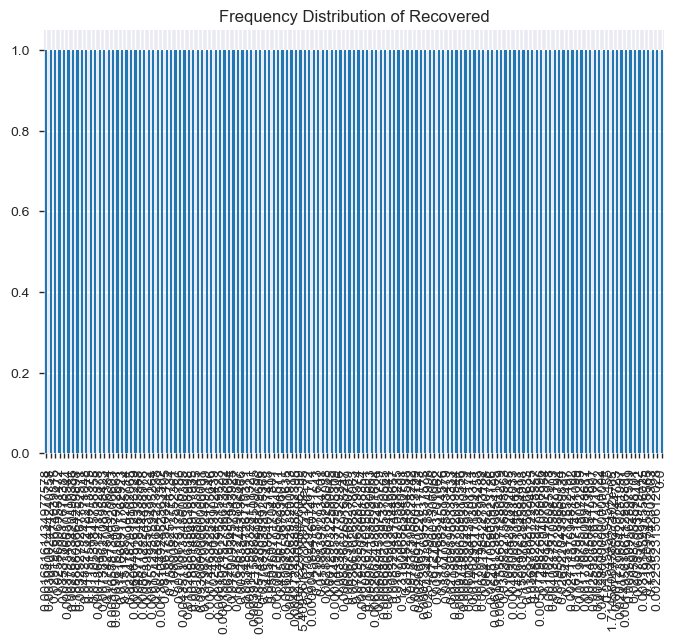

In [40]:

merged_df['Recovered'].value_counts().plot.bar(title='Frequency Distribution of Recovered')


### Visual 3: Nutrition 

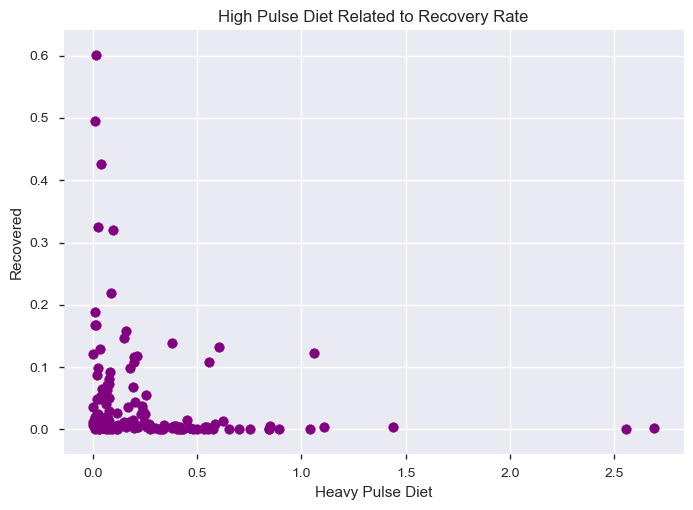

In [41]:
c = merged_df['Pulses']
d = merged_df['Recovered']
plt.scatter(c,d, color = 'purple')
plt.xlabel('Heavy Pulse Diet')
plt.ylabel("Recovered")
plt.title('High Pulse Diet Related to Recovery Rate')
plt.show()

### Visual 4: Nutrition Pairplot of various diets' correlation

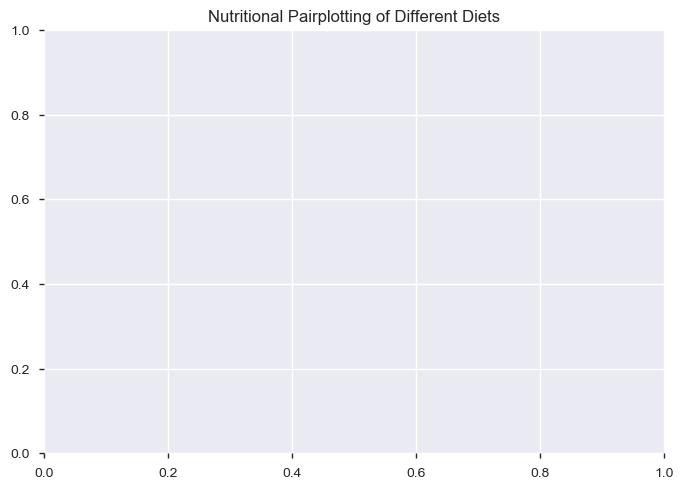

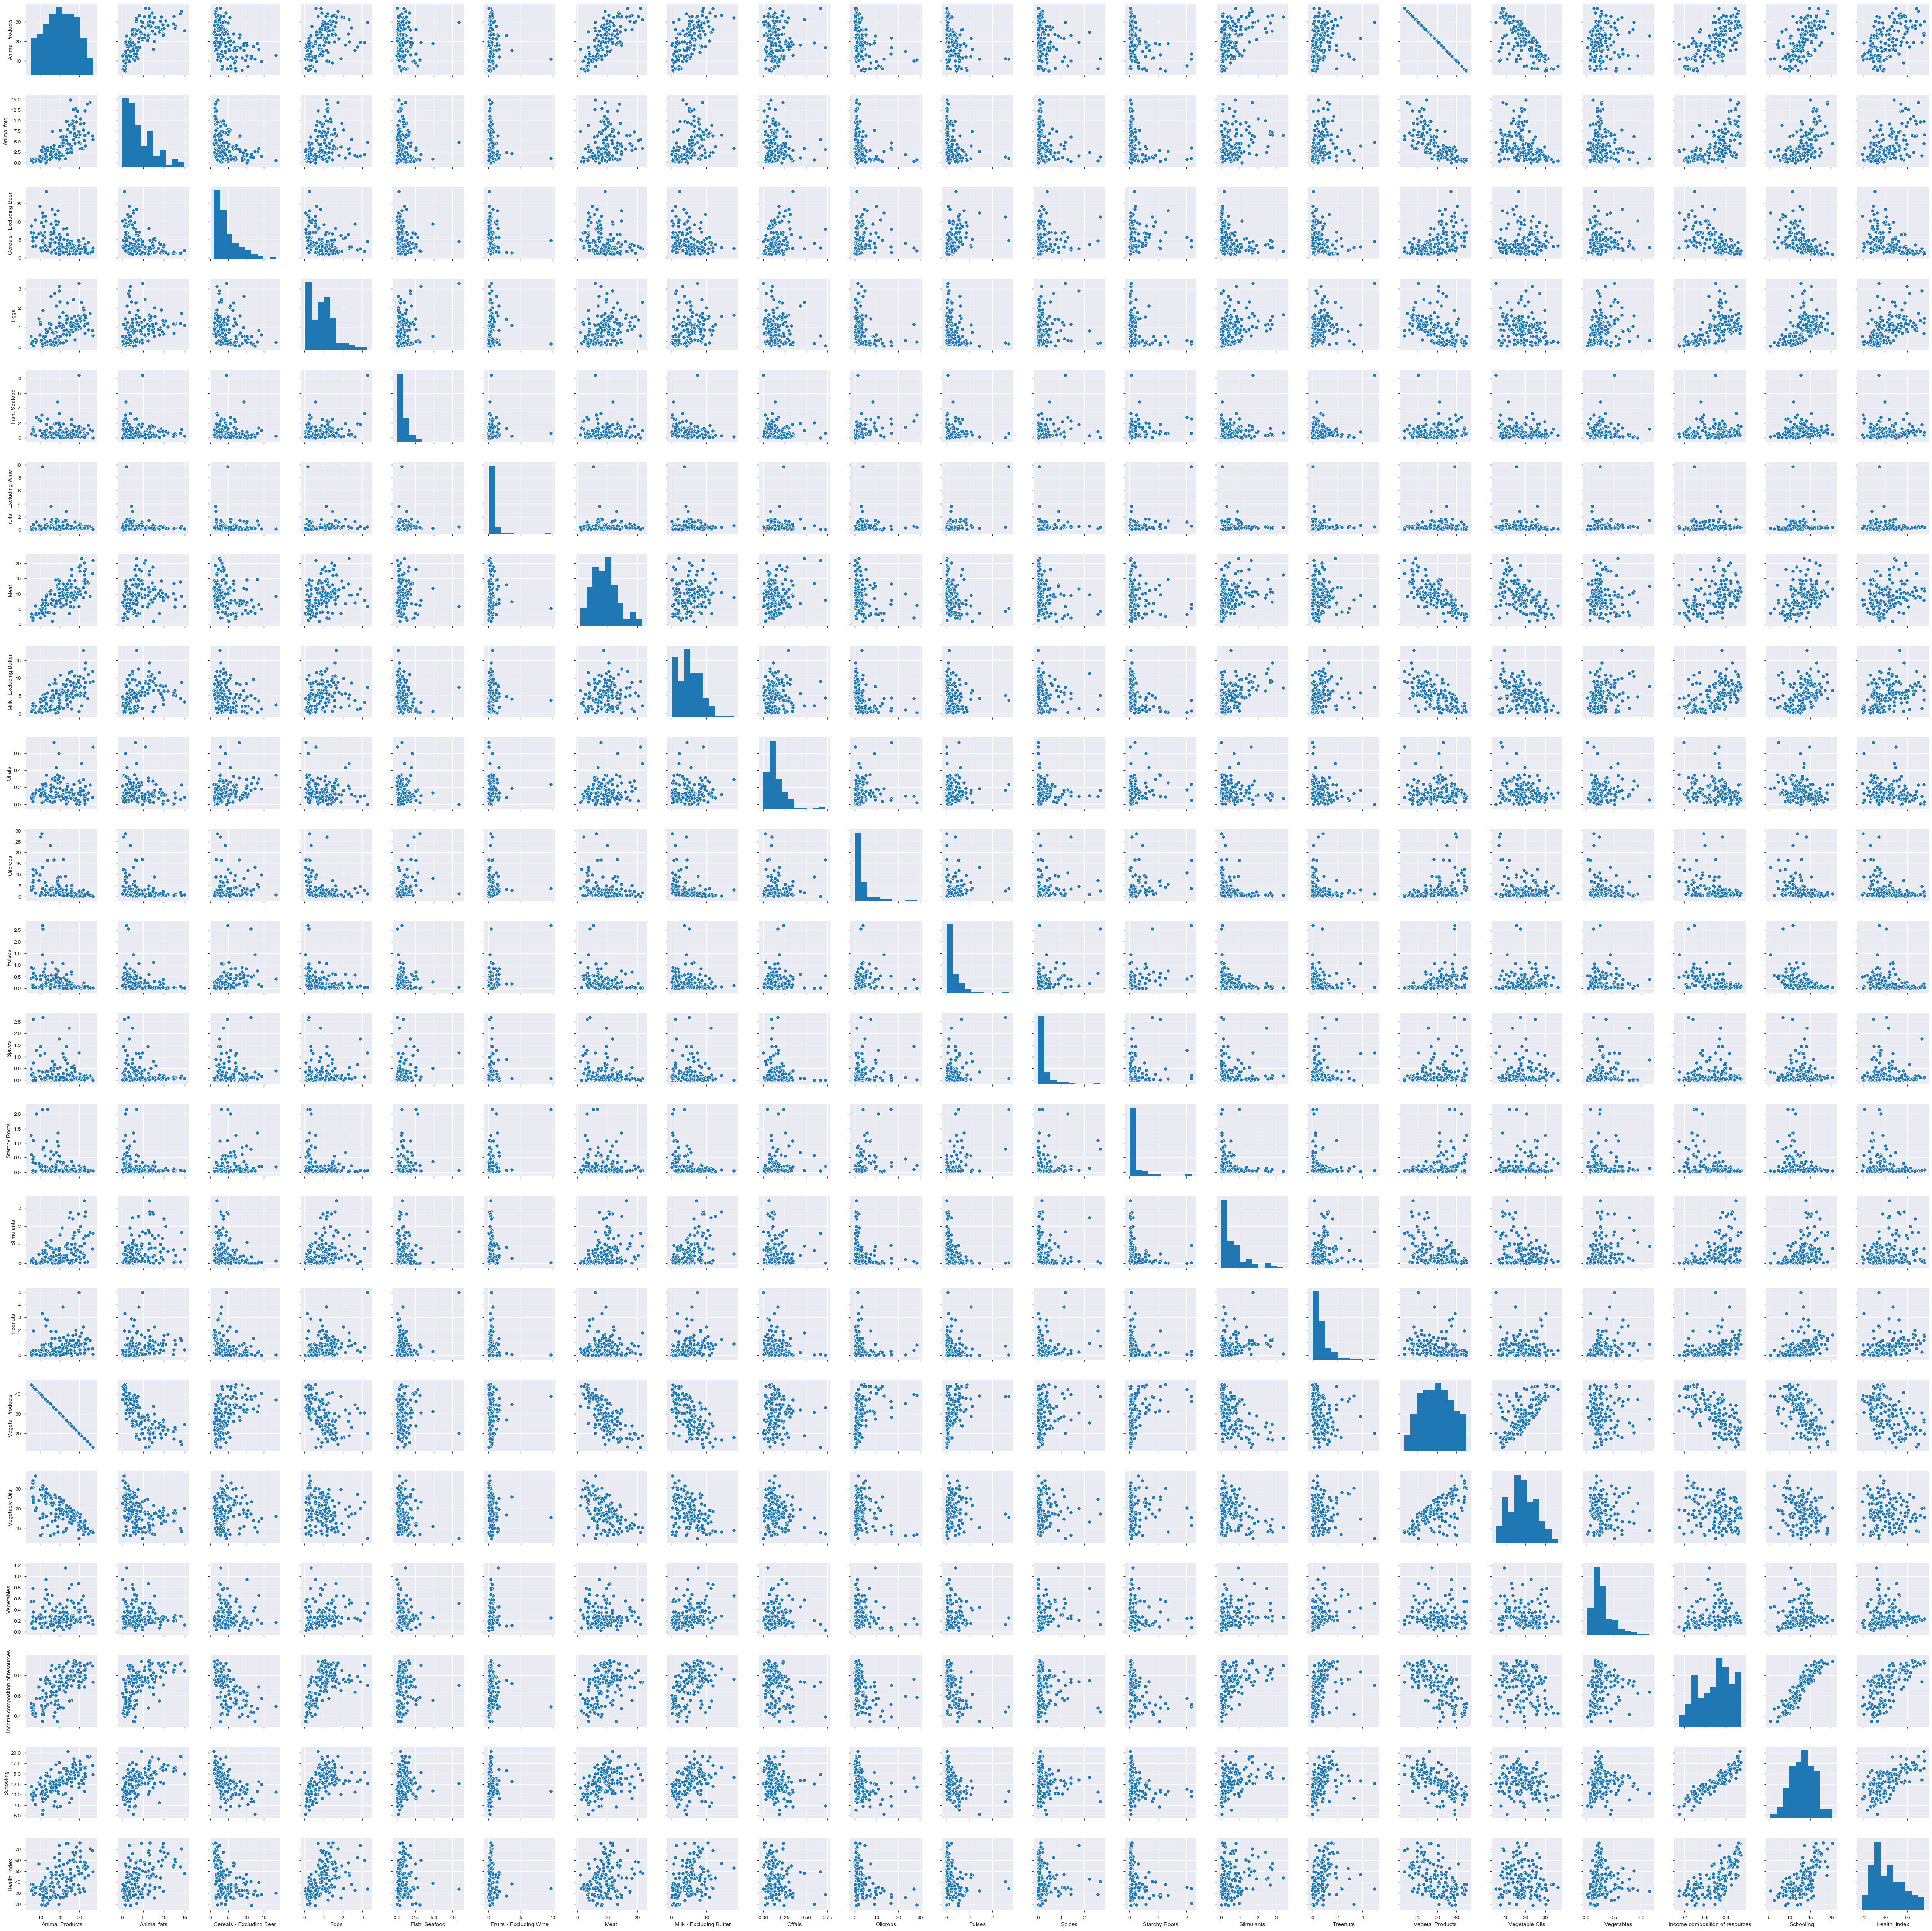

In [42]:
nutrition_df1 = merged_df.drop(['Deaths','Obesity',  
                                'under-five deaths ',
                                'Recovered', 'Active',
                                'Country','under-five deaths ', 
                                'Unit (all except Population)', 'Year',
                                'Status',' BMI ','Polio','percentage expenditure',
                                'Confirmed','Diphtheria ', ' HIV/AIDS', 
                                'Population_x', 'Population_y',
                                'Life expectancy ', 'Adult Mortality',
        ], axis=1)
#nutrition_df= nutrition_df.drop(['treenuts_categorical'], axis=1)
 #'Obesity',  'Deaths',
       #'Recovered', 'Active', 'Population_x', 'Unit (all except Population)',
       #'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       #'percentage expenditure', ' BMI ', 'under-five deaths ', 'Polio',
       #'Diphtheria ', ' HIV/AIDS',


plt.title('Nutritional Pairplotting of Different Diets')
sns.pairplot(nutrition_df1)

## Decision Tree (Regression)

### Target Variable: Recovery rate = 'Recovered' as continuous value

### Independents: Series of Nutritional Diets

In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 

#X = merged_df[['percentage expenditure',' BMI ','Polio','Treenuts','Pulses','Meat','Vegetables','Health_index']]
#X = merged_df['Treenuts','Health_index'] #Dropping a bunch to check
merged_df_dropped = merged_df.dropna()
# X = merged_df_dropped[['Treenuts', 'Health_index']]
X = merged_df_dropped.drop(columns=['Deaths', 
                                    'under-five deaths ',
                                    'Recovered', 
                                    'Country', 
                                    'Unit (all except Population)', 
                                    'Status', 
                                    'Confirmed', 
                                    'Population_x', 
                                    'Population_y'])
y = merged_df_dropped['Recovered']

#Split data to train and test with 20% sample 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state =5)

#regressor = DecisionTreeRegressor()
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)  

DecisionTreeRegressor()

In [44]:
(merged_df_dropped['Recovered'] > 0.5)

0      False
1      False
2      False
3      False
5      False
       ...  
137    False
139    False
140    False
143    False
144    False
Name: Recovered, Length: 123, dtype: bool

### Note:
We will identify the most important features in the training set in our Decision Tree Regression model. 

In [45]:
merged_df_dropped.index

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  11,
            ...
            131, 132, 133, 134, 136, 137, 139, 140, 143, 144],
           dtype='int64', length=123)

In [46]:
print(dtr_model.score(X_train, y_train))

1.0


In [47]:
print(dtr_model.score(X_test, y_test))

-0.6108109683200682


In [70]:
pd.Series(dtr_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Life expectancy                    4.344490e-01
Starchy Roots                      3.403535e-01
Cereals - Excluding Beer           1.021883e-01
Active                             3.891012e-02
Offals                             2.390078e-02
Schooling                          1.769176e-02
Vegetables                         8.377621e-03
Fish, Seafood                      6.602875e-03
Income composition of resources    6.562577e-03
Diphtheria                         5.603951e-03
Spices                             4.725922e-03
Fruits - Excluding Wine            3.783575e-03
Vegetable Oils                     2.641331e-03
Eggs                               2.057723e-03
Treenuts                           1.012967e-03
Milk - Excluding Butter            8.068200e-04
Stimulants                         1.720608e-04
Polio                              5.463217e-05
 BMI                               4.997524e-05
Adult Mortality                    2.979620e-05
Animal Products                    7.596

### Observation: 
Our Decision Tree Regression model overfit the training data with a score of '1', while severely not fitting the test data above with -.01. We will run a second model: Linear Regression model. We will use the same target variable 'Recovered' and the above independent variables.

## Linear Regression Model
### Note:
We will check the score of our Linear Regression model on our test training set.

In [48]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(X_train, y_train)

LinearRegression()

In [49]:
line.score(X_train, y_train)

0.3861260490273343

In [71]:
line.score(X_test, y_test)

0.20605411393167627

In [50]:
#What do our coefficients say regarding our target ('Regressor')?
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# We add a constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(y, X).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Recovered   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1.918
Date:                Mon, 15 Jun 2020   Prob (F-statistic):            0.00963
Time:                        18:26:47   Log-Likelihood:                 145.39
No. Observations:                 123   AIC:                            -228.8
Df Residuals:                      92   BIC:                            -141.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Animal Pro

### Observations
We see that the score is much lower on our test set. This means that our second model also overfit the data to the training set. 

Also, below, We see that our independent variable of interest "Tree Nuts" did not rank in the top 10. This means it does not have as much significance as we hypothesized.

The top ten nutritional features of importance (independent variables) are as follows for the Linear Regression Model: 1) 'Starchy Roots', 2)'Cereals - Excluding Beer', 3) 'Offals', 4) 'Vegetables', 5) 'Fish, Seafood', 6) 'Animal fats', 7) 'Spices', 8) 'Fruits - Excluding Wine', 9)'Vegetable Oils', 10)'Eggs'. 'Treenuts' did not rank high in the Decision Tree Regression model's features of importance. 

However, in reviewing our Ordinary Least Squares model (Linear Regression) our'Treenuts' coefficient regressing on the target variable, 'Recovery', we calculated 0.3615 with a p-value of .04--which is pretty strong. 

Because our two models (DTR and Linear Regression model) overfit our training data, we will use the Random Forest model (RFM) in addition to tuning our parameters. We selected RFM because it is ideal for larger data and estimates missing data while running a series of decision trees with different combinations of our features influencing (or not influencing) our target variable: COVID-19 'Recovery' rate. For example, we also dropped these features: 'Death', 'under-age five' deaths, and 'Confirmed ' because they are not in the sample of infected with COVID-19.

## Random Forest Regression Model
We will Uise GridSearchCV tool to tune parameters to help with overfitting in our final model.

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, n_estimators=1000)

rfr.fit(X_train, y_train)

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.7639240986409821
0.25121836550692256


In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50,100,200,500],
    'criterion': ['mse', 'mae'],
    'max_depth': [2,3,None],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,4,6]
}

random_forest_grid = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=1, cv=3)
random_forest_grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:  5.7min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=1)

In [54]:
random_forest_grid.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 50}

In [55]:
random_forest_grid.best_score_

0.3370534915128684

In [56]:
better_rfr = RandomForestRegressor(**random_forest_grid.best_params_)

better_rfr.fit(X_train, y_train)

print(better_rfr.score(X_train, y_train))
print(better_rfr.score(X_test, y_test))

0.5116605901627048
0.31966375847390704


### Feature Importance

In [57]:
pd.Series(better_rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Life expectancy                    0.527670
Income composition of resources    0.221833
Active                             0.054493
Cereals - Excluding Beer           0.052489
Animal Products                    0.036105
Pulses                             0.020531
Vegetal Products                   0.015512
Fish, Seafood                      0.015260
Animal fats                        0.012240
Stimulants                         0.010632
Vegetable Oils                     0.008349
Starchy Roots                      0.006505
Milk - Excluding Butter            0.005257
Polio                              0.004526
Offals                             0.001686
Fruits - Excluding Wine            0.001521
Health_index                       0.001457
 BMI                               0.001361
Diphtheria                         0.000926
Vegetables                         0.000578
Treenuts                           0.000389
Schooling                          0.000368
Oilcrops                        

### Visual 5: Bar Plot of Features Importance Among Selected Factors

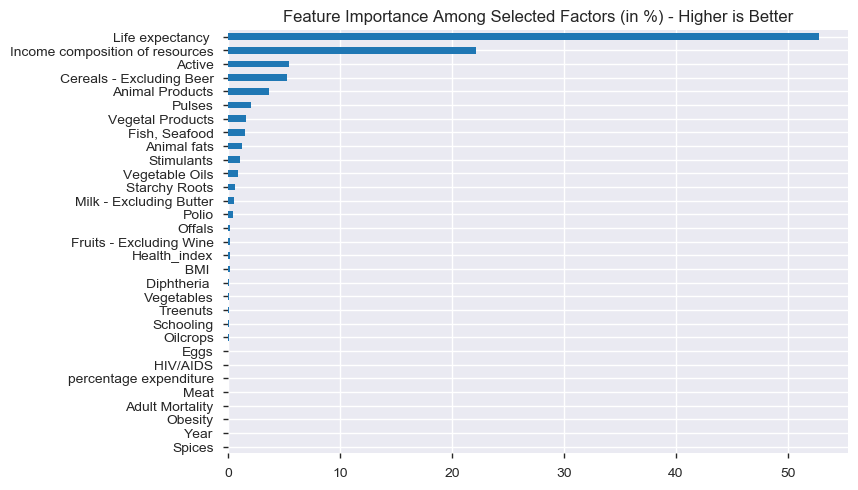

In [58]:
(pd.Series(better_rfr.feature_importances_, index=X_train.columns)*100).sort_values(ascending=True).plot(kind='barh', title='Feature Importance Among Selected Factors (in %) - Higher is Better')

In [59]:
X_train['Life expectancy ']
plt.show()

In [60]:
X_train['Life expectancy '].plot

### Observations
In the Random Forest Model, our top ten features of importance do not list 'Treenuts'.  We see that our independent variable of interest "Tree Nuts" did not rank in the top 10. This means it does not have as much significance as we hypothesized.

The top 10 dietary items include: 1) 'Life expectancy', 2) 'Pulses', 'Deaths', 'Cereals', 5) 'Schooling', 6) 'Animal fats', 7) 'Stimulants', 8) 'Milk - Excluding Butter', 9) 'Vegetables', and 10)'Offals'.

### Note:
Thressholds: Organizing Numerical Values in Diet into Categorical for Comparison

We will set a thresshold of 'Recovery' to 10 percent to see countries that fall into that classifying group.

In [65]:
merged_df[merged_df['Recovered'] <= 0.1]

Country  Animal Products  Animal fats  \
0            Afghanistan          21.6397       6.2224   
1                Albania          32.0002       3.4172   
2                Algeria          14.4175       0.8972   
3                 Angola          15.3041       1.3130   
4    Antigua and Barbuda          27.7033       4.6686   
..                   ...              ...          ...   
139              Uruguay          25.5069       3.4811   
140           Uzbekistan          25.9903       2.4884   
142                Yemen          12.5401       2.0131   
143               Zambia           9.6005       1.6113   
144             Zimbabwe          10.3796       2.9543   

     Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
0                      8.0353  0.6859         0.0327                   0.4246   
1                      2.6734  1.6448         0.1445                   0.6418   
2                      4.2035  1.2171         0.2008                   0.5772   
3                      6.5545  0.1539         1.4155                   0.3488   
4                      3.2153  0.3872         1.5263                   1.2177   
..                        ...     ...            ...                      ...   
139                    2.5698  1.2804         0.3281                   0.1777   
140                    2.7168  1.0639         0.0962                   0.5830   
142                   11.5271  0.5514         0.3847                   0.2564   
143                   14.3225  0.6266         1.0070                   0.1343   
144                    9.7922  0.3682         0.2455                   0.0614   

        Meat  Milk - Excluding Butter  Offals  ...  percentage expenditure  \
0     6.1244                   8.2803  0.3103  ...               71.279624   
1     8.7428                  17.7576  0.2933  ...              364.975229   
2     3.8961                   8.0934  0.1067  ...                0.000000   
3    11.0268                   1.2309  0.1539  ...                0.000000   
4    14.3202                   6.6607  0.1347  ...                0.000000   
..       ...                      ...     ...  ...                     ...   
139  12.2841                   8.0603  0.0729  ...                0.000000   
140  10.3624                  11.8050  0.1743  ...                0.000000   
142   8.0010                   1.3463  0.2436  ...                0.000000   
143   4.9010                   1.2756  0.1790  ...                0.000000   
144   4.5674                   2.1040  0.1315  ...                0.000000   

      BMI   under-five deaths   Polio  Diphtheria    HIV/AIDS  Population_y  \
0     19.1                  83    6.0         65.0        0.1    33736494.0   
1     58.0                   0   99.0         99.0        0.1       28873.0   
2     59.5                  24   95.0         95.0        0.1    39871528.0   
3     23.3                  98    7.0         64.0        1.9     2785935.0   
4     47.7                   0   86.0         99.0        0.2           NaN   
..     ...                 ...    ...          ...        ...           ...   
139   64.0                   0   95.0         95.0        0.1     3431552.0   
140   44.7                  17   99.0         99.0        0.1      312989.0   
142   41.3                  47   63.0         69.0        0.1           NaN   
143   23.4                  40    9.0          9.0        4.1      161587.0   
144   31.8                  32   88.0         87.0        6.2    15777451.0   

     Income composition of resources  Schooling  Health_index  
0                              0.479       10.1          32.3  
1                              0.762       14.2          52.9  
2                              0.743       14.4          23.6  
3                              0.531       11.4          25.2  
4                              0.784       13.9          29.0  
..                               ...        ...           ...  
139          

### Sorting Eastern Mediterranean Countries
We are curious about a region with a high 'Treenuts' content in their daily diet. So we selected the Eastern Mediterranean region from the World Health Organization grouping.

### Note: 
We will set a thresshold of 'Treenut' to .015 (1.5 percent daily intake) to see countries that fall into that classifying group of consuming tree nuts and level of incorporating.

In [66]:
#Create a subclass to compare/contrast countries consuming "Treenuts"
#Treenuts_categorical will be those countries consuming below our thresshold of 1.5 percent .015
merged_df['treenuts_categorical'] = merged_df['Treenuts'] <= 0.015
merged_df['treenuts_categorical']

0      False
1      False
2      False
3      False
4      False
       ...  
140    False
141    False
142    False
143     True
144    False
Name: treenuts_categorical, Length: 145, dtype: bool

## Visual 6: Visualizing 'Recovery Rate Across Eastern Mediterranean Countries'
### Hardest Hit Countries Comparison
#### Goal: To plot countries' recovery rates w/r/t nutritional categories--subclass plotting | Plot counts for each country's recovery rate.

Text(0.5, 1, 'Recovery Rate Across Eastern Mediterranean Countries Regarding Treenuts Diet')

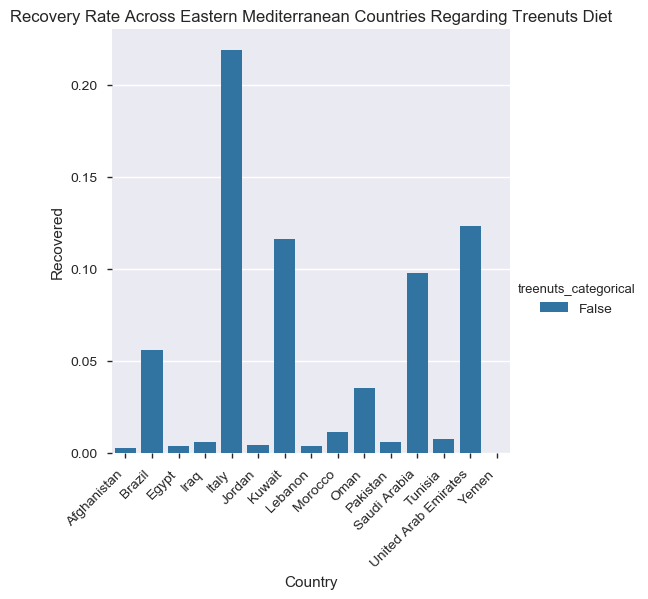

In [67]:
#Inserting top ranked countries w/highest number of COVID-19 cases (Italy, US, and Brazil(more recently))
chart = sns.catplot(x="Country", y="Recovered", hue='treenuts_categorical', kind="bar", data=merged_df[merged_df['Country'].isin(['Italy','United States'
                        , 'Brazil','Iran','Lebanon', 'Afghanistan','Kuwait', 'Pakistan', 'Saudi Arabia','Jordan',
                        'Syria','Yemen','Egypt','United Arab Emirates','Oman','Bahrain','Qatar','Morocco','Libya','Tunisia','Iraq'])]);
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Recovery Rate Across Eastern Mediterranean Countries Regarding Treenuts Diet')

In [68]:
merged_df.loc[[0,40,64,70,74,76,92,103,104,114,133,138,142],'Treenuts']

0      0.7513
40     0.2992
64     0.6341
70     0.9018
74     1.1810
76     2.9110
92     1.9048
103    0.6107
104    0.1909
114    0.7128
133    2.3289
138    3.8246
142    0.0769
Name: Treenuts, dtype: float64

In [69]:
#merged_df.iloc[[0,40,70,71,77,83,87,103,116,117,133],'Treenuts'].mean()
merged_df[merged_df['Country'].isin(['Lebanon', 'Afghanistan','Kuwait', 'Pakistan', 'Saudi Arabia','Jordan','Syria','Yemen','Egypt','United Arab Emirates','Oman','Bahrain','Qatar','Morocco','Libya','Tunisia','Somalia','Iran','Iraq'])]

Country  Animal Products  Animal fats  \
0             Afghanistan          21.6397       6.2224   
40                  Egypt          15.9979       3.4231   
64                   Iraq          11.1327       3.8118   
70                 Jordan          12.2622       1.8696   
74                 Kuwait          19.8923       2.1588   
76                Lebanon          12.4024       2.1637   
92                Morocco          15.4227       3.5807   
103                  Oman          23.6146       2.3712   
104              Pakistan          24.8245       8.9701   
114          Saudi Arabia          15.3954       2.6475   
133               Tunisia          12.7886       2.6543   
138  United Arab Emirates          21.4437       4.0036   
142                 Yemen          12.5401       2.0131   

     Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
0                      8.0353  0.6859         0.0327                   0.4246   
40                    13.4988  0.8448         1.3200                   0.7216   
64                     6.2761  1.9023         0.1441                   0.2306   
70                     3.7391  0.5224         0.3189                   0.1980   
74                     3.0847  2.3242         0.3732                   0.3496   
76                     2.2530  0.3290         0.3681                   0.5800   
92                     7.1539  1.1517         1.2329                   0.7014   
103                    3.7744  1.4422         0.9290                   0.7926   
104                    4.2124  0.6203         0.0818                   0.1227   
114                    5.2126  0.9019         0.4122                   0.4219   
133                    3.2543  0.9255         0.5085                   0.4068   
138                    3.0418  1.1407         0.8108                   0.6766   
142                   11.5271  0.5514         0.3847                   0.2564   

       Meat  Milk - Excluding Butter  Offals  ...   BMI   under-five deaths   \
0    6.1244                   8.2803  0.3103  ...   19.1                  83   
40   6.4678                   3.6343  0.2992  ...   61.1                  60   
64   3.5164                   1.7366  0.0288  ...   59.1                  38   
70   5.8122                   3.6512  0.0880  ...   65.6                   4   
74   9.5706                   5.2766  0.1890  ...   71.4                   1   
76   5.1361                   4.3553  0.0502  ...   66.1                   1   
92   6.9989                   2.2296  0.2289  ...   58.5                  20   
103  9.0171                   9.6407  0.2144  ...   54.6                   1   
104  3.4967                  11.5125  0.1431  ...   25.4                 433   
114  6.9243                   4.4125  0.0970  ...   68.2                   8   
133  4.0323                   4.5764  0.0915  ...   61.2                   3   
138  9.4610                   5.8600  0.1677  ...   64.2                   1   
142  8.0010                   1.3463  0.2436  ...   41.3                  47   

     Polio  Diphtheria    HIV/AIDS  Population_y  \
0      6.0         65.0        0.1    33736494.0   
40    93.0         93.0        0.1           NaN   
64    63.0         58.0        0.1    36115649.0   
70    99.0         99.0        0.1      915932.0   
74    99.0         99.0        0.1           NaN   
76    75.0         81.0        0.1     5851479.0   
92    99.0         99.0        0.1     3483322.0   
103   99.0         99.0        0.1           NaN   
104   72.0         72.0        0.1    18938513.0   
114   97.0         98.0        0.1           NaN   
133   98.0         98.0        0.1    11273661.0   
138   99.0         99.0        0.1           NaN   
142   63.0         69.0        0.1           NaN   

     Income composition of resources  Schooling  Health_index  \
0                              0.479       10.1          32.3   
40                             0.688       13.1          39.9   
64         

# Results:
After running three models and tuning our parameters, we improved both our training and test set scores. 
For example, our train score of 0.512 improved from 0.3861 in our LR model. Meanwhile, our Random Forest Regressor model's test of 0.386 improved upon our LR model's lower test score of 0.206 after parameter tuning. 

Our Random Forest Model dealt with the entropy, or noise, that is introduced when many features are included in a model to measure our target of COVID-19 recovery rate as 'Recovered'. Many factors play a role. Surprisingly, the Health Score Index did not carry the majority of the explanatory power. As seen in our first visual, the scatterplot did not show a one to one correlation. Countries with a medium Health Score Index (HSI)had higher COVID-19 recovery rates compared to some countries with a higher HSI. At this point, we considered additional factors beyond state investement, like nutrtition and regional dietary choices. We selected a region, Eastern Mediterranean, to review their nutritional impact on 'Recovered' rate by considering how nutrition may build immunity to stave off viruses. The Eastern Mediterranean region emerged as a choice because they experienced the Middle East Respiratory Syndrome in 2015. 

Subpoints to note show that the Eastern Mediterranean countries included (Afghanistan, Egypt, Iraq, Jordan, Kuwait, Lebanon, Morocco, Oman, Pakistan, Saudi Arabia, Tunisia, United Arab Emirates, and Yemen) present a range between .076 (Yemen) to 3.82 (UAE) regarding 'Treenuts' composite in diet. This range may be attributed to income per capita. Specifically, the lowest end of spectrum is Yemen, a lower-income country, in contrast to the highest end of spectrum UAE, a high-income country. We would need to do a comparative analysis to see if the same trend occurs with this diet in another region and see if income disproportionally affects the consumption of tree nuts.

# Gaps for Further Study:
Upon reflection, we could have controlled for income and its access to nutrition. More specifically, nutrition includes higher-priced food items that are more expensive to transport from mountainous to desert regions. If we were to run a regression model on nutritional items and price, consuming 'Tree nuts' (almonds, pine nuts, hazlenuts, pistachios and walnuts) would present a premium. 

To better test the regional nutritional theory positively influencing the COVID-19 recovery rate, we should have sampled the top 10 percent of the population in each Eastern Mediterranean country. Then we would have been better compare the access to high-priced food items, like 'Tree nuts' category, which are more readily available and prepared in higher-priced dishes, like desserts and meat-based rice. These are dishes that populations below the poverty line cannot afford, and thereby cannot easily incorporate into their daily diets to build immunity and ultimately lead to likely recovery--if infected by COVID-19.  